## TP1 :  Difféerences finies pour options à barriéres

### Implémentation des différents schémas :

In [45]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 

In [51]:
def mat_A(N):
    A = np.zeros((N , N))
    for i in range(N - 1) :
        A[i , i]  = 2
        A[i + 1 , i] = - 1
        A[i , i + 1] = - 1
    A[N -1 , N - 1] = 2
    return A
    
def mat_B(N , alhpa , beta) :
    B = np.zeros(N)
    B[0 ] = alhpa
    B[N - 1]  = beta
    return B
    
        

def schema(N  , M , phi  , alpha , beta  , a, b  , T , sigma , update ) :
    """
    
    """
    delta_X = (b - a) / (N + 1)
    delta_T = T / M
    mu = (sigma**2)*delta_T / (2*(delta_X**2))
    # x = np.array([a + n*delta_X  for n in range(0 , N+2)])
    # t = np.array([m*delta_T for m in range(0 , M + 1)])
    
    U = np.zeros((N+2 , M + 1))

    U[0] = [alpha]*(M + 1)
    U[N + 1] = [beta]*(M + 1)
    for n in range(1 , N+ 1) :
        U[n , 0] = phi(a + n*delta_X)

    # Algo :
    I = np.eye(N)
    A = mat_A(N)
    B  = mat_B(N , alpha , beta)
    for m in range(1 , M):
        # U[1:N+1, m] = (I - mu*A)@U[1:N+1 , m -1] + mu*B
        U[1:N+1 , m] = update(U[1:N+1 , m -1] , mu , N ,alpha  , beta)
        
    return U


def update_explicite(U , mu , N , alpha  , beta):
    I = np.eye(N)
    A = mat_A(N)
    B  = mat_B(N , alpha , beta)
    return (I - mu*A)@U + mu*B

def update_implicite(U , mu , N , alpha  , beta):
    I = np.eye(N)
    A = I + mu*mat_A(N)  
    B  = U + mu*mat_B(N , alpha , beta)
    return np.linalg.solve(A , B)

def update_crank_nicolson(U , mu , N , alpha  , beta):
    I = np.eye(N)
    a = mat_A(N)
    A = I + (mu/2)*a  
    B  = (I - (mu/2)*a)@U + mu*mat_B(N , alpha , beta)
    return np.linalg.solve(A , B)


def choix_max_N(M , b , a , sigma , T):

    return math.floor(np.sqrt(M*(b-a) / (T*sigma**2) ) - 1 )




In [52]:
phi = lambda x : max(x, 0)
alpha = 0
beta = 0
a = -1
b = 1
T = 1
sigma = 0.1
N = 100
M = 100
print(choix_max_N(M , b , a , sigma , T))


140


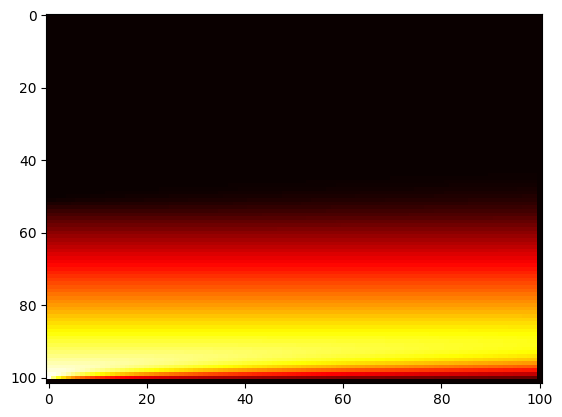

In [53]:
U_explicite = schema(N , M , phi , alpha , beta , a , b , T , sigma , update_explicite)
np.set_printoptions(precision=3, suppress=True)
# print(U_explicite)
plt.imshow(U_explicite, cmap='hot', aspect='auto', interpolation='none')

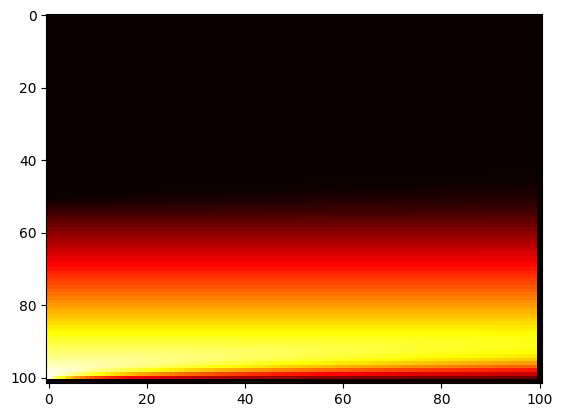

In [41]:
U_implicite = schema(N , M , phi , alpha , beta , a , b , T , sigma , update_implicite)
np.set_printoptions(precision=3, suppress=True)
# print(U_implicite)
# plt.imshow(U_implicite)
plt.imshow(U_implicite, cmap='hot', aspect='auto', interpolation='none')


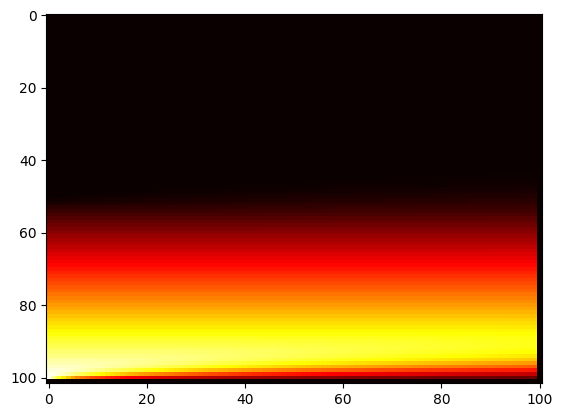

In [42]:

U_crank_nicolson = schema(N , M , phi , alpha , beta , a , b , T , sigma , update_crank_nicolson)
np.set_printoptions(precision=3, suppress=True)
# print(U_crank_nicolson)
# plt.imshow(U_crank_nicolson)
plt.imshow(U_crank_nicolson, cmap='hot', aspect='auto', interpolation='none')
